# TAREA 3. Limpeza de Datos e Implementación de Modelo Support Vector Machine 
> **Mauricio Montanares**

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [151]:
#cargamos la data
dataset = pd.read_excel('IrisSetosaT3.xlsx')

# Analisis del Dataset 

##### Tamaño 

In [152]:
dataset.shape

(156, 10)

> 156 filas, 9 columnas

## Primera vista al contenido del Dataset

In [153]:
info=dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Species_No    156 non-null    int64  
 1   Petal_width   150 non-null    float64
 2   Comp2         156 non-null    object 
 3   Petal_length  155 non-null    float64
 4   Comp1         155 non-null    float64
 5   Sepal_width   155 non-null    float64
 6   Sepal_length  155 non-null    float64
 7   Comp2.1       152 non-null    float64
 8   Species_name  155 non-null    object 
 9   Obs           151 non-null    object 
dtypes: float64(6), int64(1), object(3)
memory usage: 12.3+ KB


> Notamos que existen columnas con diferentes tipos de datos, numericos como no numericos.

> Algunas columnas presentan elementos nulos.

In [154]:
#descripcion de las columnas con datos del tipo numerico (float64, int64)
dataset.describe()

,Species_No,Petal_width,Petal_length,Comp1,Sepal_width,Sepal_length,Comp2.1
count,156.000000,150.000000,155.000000,155.000000,155.000000,155.000000,152.000000
mean,2.012821,1.201333,3.856774,4.023871,3.036129,5.667742,5.646711
std,0.819025,0.898469,2.302935,2.321416,0.757721,1.562878,1.571009
min,1.000000,0.000000,0.000000,0.200000,0.000000,-5.000000,-5.000000
25%,1.000000,0.300000,1.550000,1.700000,2.800000,5.100000,5.100000
50%,2.000000,1.300000,4.300000,4.500000,3.000000,5.700000,5.700000
75%,3.000000,1.800000,5.100000,5.300000,3.350000,6.400000,6.400000
max,3.000000,5.600000,20.500000,20.700000,8.700000,10.200000,10.200000


In [155]:
#visualizacion de los primeros elementos del dataset
dataset.head()

,Species_No,Petal_width,Comp2,Petal_length,Comp1,Sepal_width,Sepal_length,Comp2.1,Species_name,Obs
0,1,0.2,0.14,1.4,1.6,3.5,5.1,5.1,Setosa,James
1,1,0.2,0.14,1.4,1.6,3.0,4.9,4.9,Setosa,James
2,1,0.2,0.14,1.3,1.5,3.2,4.7,4.7,Setosa,James
3,1,0.2,0.14,1.5,1.7,3.1,4.6,4.6,Setosa,James
4,1,0.2,0.14,1.4,1.6,3.6,5.0,5.0,Setosa,Peter


> Notamos que la columa 'Comp2' contiene informacion numerica pero almacenada como str. Debemos convertir estos datos.

> Sepal_length y Comp2.1 se ven sospechosamente similares, al menos en head. Lo analizaremos en detalle mas adelante.

In [156]:
compare = dataset['Sepal_length'] == dataset['Comp2.1']

true, false = 0, 0
for i in range(len(compare)):
    if compare[i] == True:
        true += 1
    else:
        false +=1
print("Cuantity of False:", false, "| Cuantity of True:", true)


Cuantity of False: 4 | Cuantity of True: 152


> Eliminamos la columna Comp2.1 por no aportar informacion relevante a la ya existente.

In [157]:
dataset.drop(labels=['Comp2.1'], axis = 1, inplace=True)

# Plots Iniciales (datos numericos)

In [158]:
#convertimos todos los elementos de str->float con exepcion de los nan
float_Comp2 = []
for i in dataset['Comp2']:
    if i != ' ': 
        float_Comp2 = [float(i)] + float_Comp2

In [159]:
#lo cargamos al dataset
dataset.drop(labels=['Comp2'], axis = 1, inplace=True)
dataset=pd.concat([dataset, pd.DataFrame(float_Comp2, columns=['Comp2'])], axis=1)

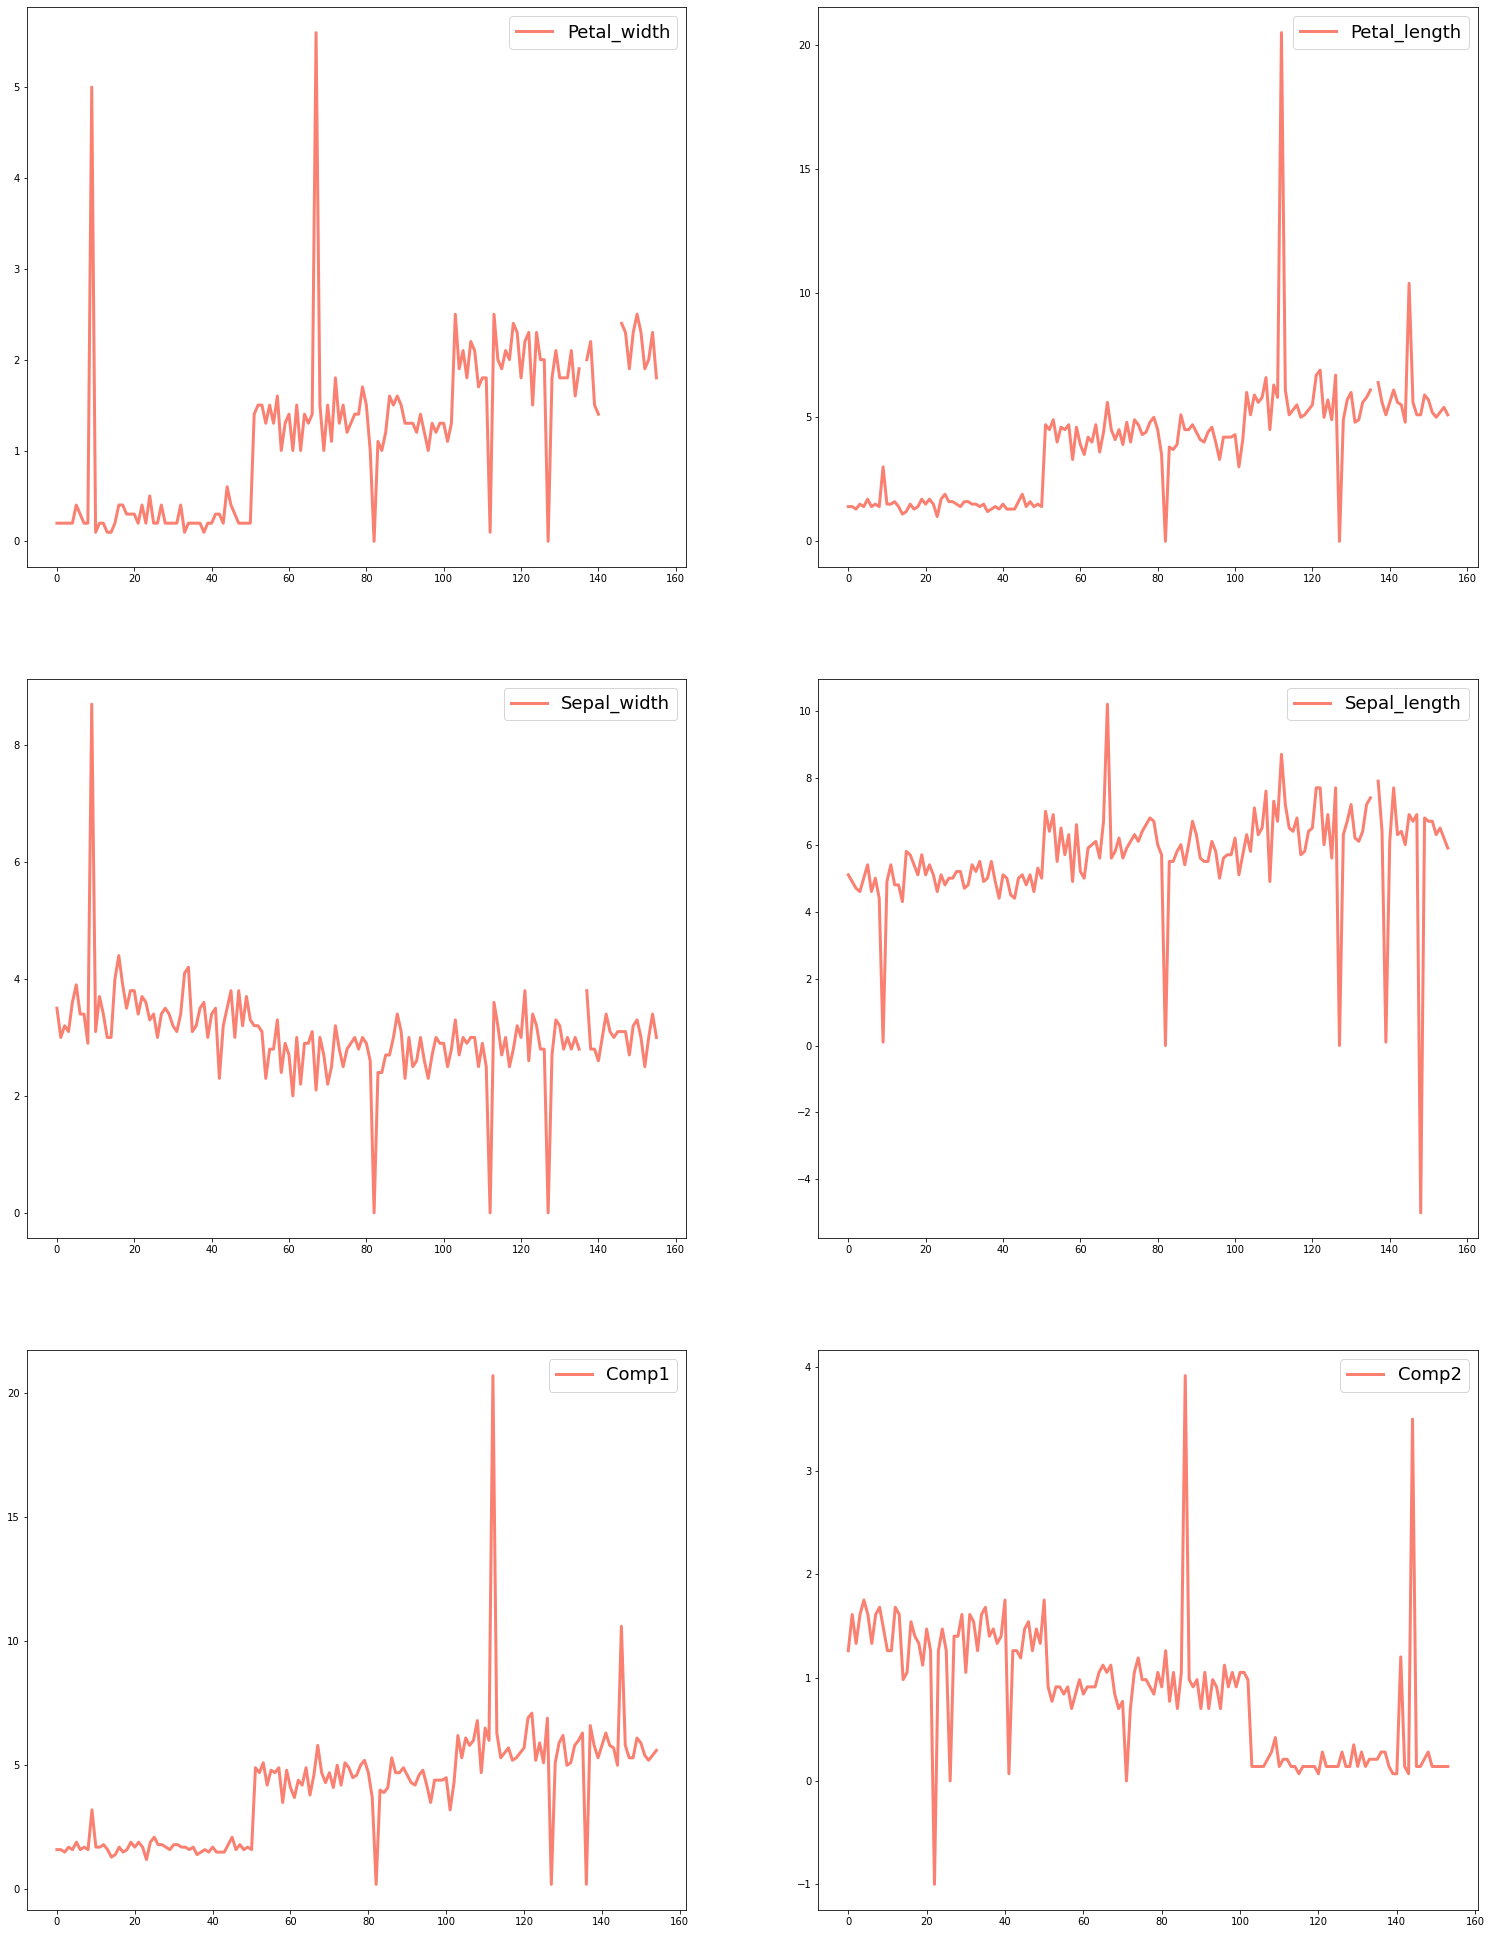

In [160]:
#Lines
plt.figure(figsize=(26, 35))

plt.subplot(321)
plt.plot(dataset['Petal_width'], color = 'salmon', label = 'Petal_width',linewidth = '3' )
plt.legend(fontsize=18)

plt.subplot(322)
plt.plot(dataset['Petal_length'], color = 'salmon', label = 'Petal_length',linewidth = '3' )
plt.legend(fontsize=18)

plt.subplot(323)
plt.plot(dataset['Sepal_width'], color = 'salmon', label = 'Sepal_width',linewidth = '3')
plt.legend(fontsize=18)

plt.subplot(324)
plt.plot(dataset['Sepal_length'], color = 'salmon', label = 'Sepal_length',linewidth = '3')
plt.legend(fontsize=18)

plt.subplot(325)
plt.plot(dataset['Comp1'], color = 'salmon', label = 'Comp1', linewidth = '3')
plt.legend(fontsize=18)

plt.subplot(326)
plt.plot(dataset['Comp2'], color = 'salmon', label = 'Comp2',linewidth = '3')
#plt.plot(float_Comp2, color = 'salmon', label = 'Comp2',linewidth = '3')
plt.legend(fontsize=18)

plt.show()

> A priemera vista se observan algunos datos faltantes. Por ejemplo en la grafica Petal_width

> Notamos que valores asignados a metricas (width, length) poseen registros negativos. Consideramos estos datos como errores

> Notamos que existen valores atipicos. Realizaremos un boxplot para visualizar los outliers

## BoxPlot

In [161]:
import seaborn as sns  #lib for nice boxplots

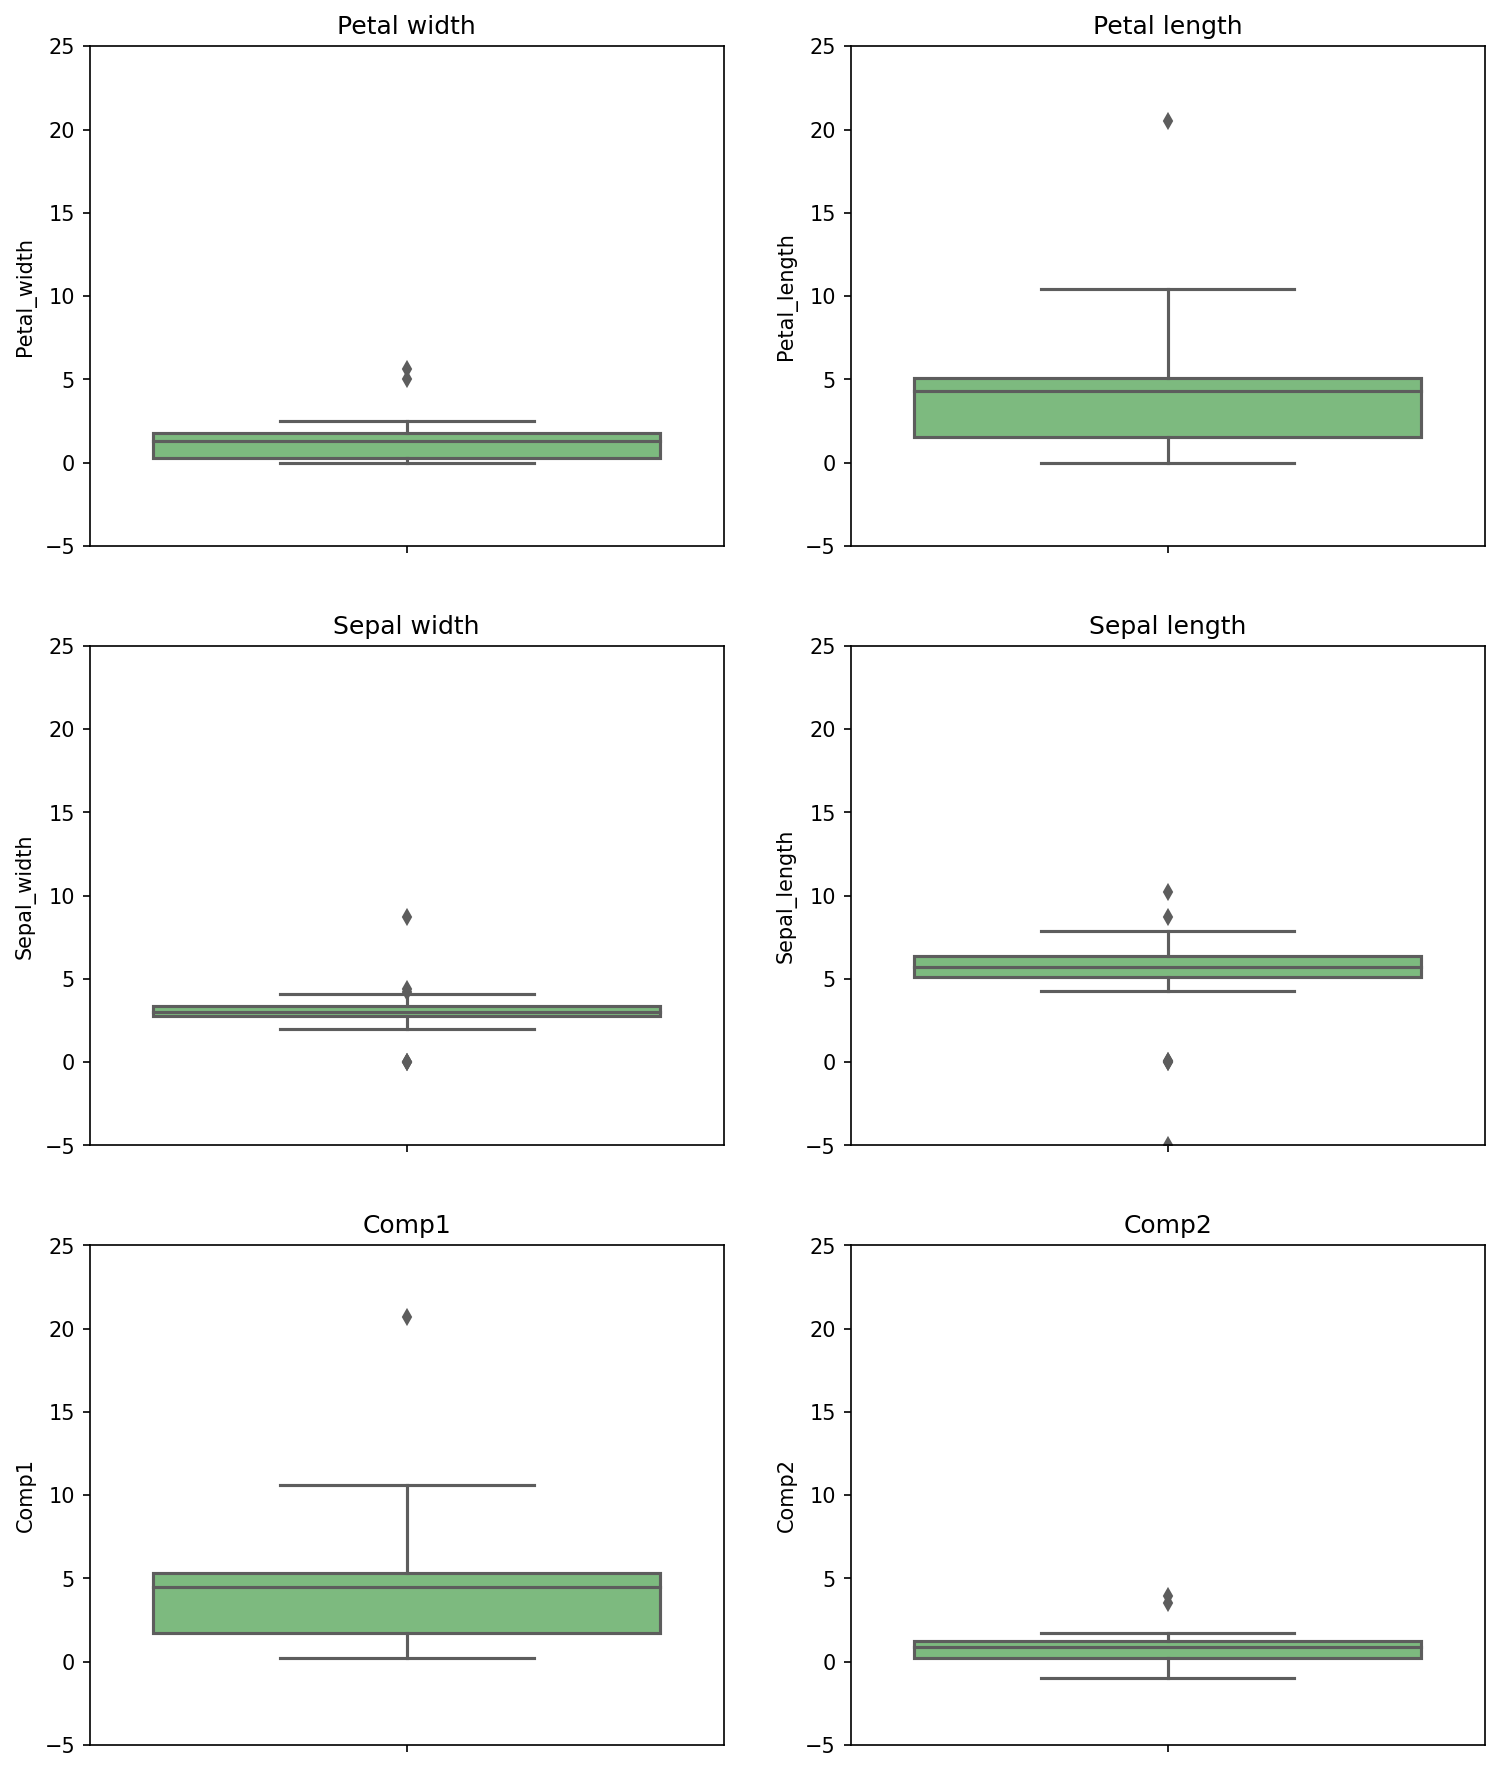

In [162]:
plt.figure(figsize=(12, 15), dpi=150)

plt.subplot(321)
sns.boxplot(y=dataset['Petal_width'], palette="Greens")
plt.title('Petal width')
plt.ylim(-5,25)

plt.subplot(322)
sns.boxplot(y=dataset['Petal_length'], palette="Greens")
plt.title('Petal length')
plt.ylim(-5,25)

plt.subplot(323)
sns.boxplot(y=dataset['Sepal_width'], palette="Greens")
plt.title('Sepal width')
plt.ylim(-5,25)

plt.subplot(324)
sns.boxplot(y=dataset['Sepal_length'], palette="Greens")
plt.title('Sepal length')
plt.ylim(-5,25)

plt.subplot(325)
sns.boxplot(y=dataset['Comp1'], palette="Greens")
plt.title('Comp1')
plt.ylim(-5,25)

plt.subplot(326)
sns.boxplot(y=dataset['Comp2'], palette="Greens")
plt.ylim(-5,25)
plt.title('Comp2')

#plt.savefig('boxs.pdf')

plt.show()


> Observamos claramente los outliers

## OUTLIERS
> Utilizaremos Z score para identificarlos y corregirlos

>Z score = (x-mean)/std.deviation

In [163]:
#funcion que almacena el valor de los outliers y la posicion de estos en el dataset.
#recibe como argumento el dataset, 'nombre_columna', valor de threshold(en base al z-score)
def find_positions_outliers(data, column, THRESHOLD):
    values_outliers = []
    positions_outliers = []
    
    mean = np.mean(data[column])
    std = np.std(data[column])
    for i in range(data.shape[0]):
        z = (data[column][i]-mean)/std
        if abs(z) > THRESHOLD:
            values_outliers.append(data[column][i])
            positions_outliers.append(i)
    
    
    return positions_outliers, values_outliers

In [164]:
columns_to_analize = ['Petal_width', 'Petal_length', 'Sepal_width', 'Sepal_length', 'Comp1', 'Comp2']
THRESHOLD = 1.5 #sensibility
for i in columns_to_analize:
    print('=================================================')
    print('')
    print('Columna', i)
    print('Posiciones, Valores Outliers = ', find_positions_outliers(dataset, i, THRESHOLD))
    print('')
    print('=================================================')
        



Columna Petal_width
Posiciones, Valores Outliers =  ([9, 67], [5.0, 5.6])


Columna Petal_length
Posiciones, Valores Outliers =  ([82, 112, 127, 145], [0.0, 20.5, 0.0, 10.4])


Columna Sepal_width
Posiciones, Valores Outliers =  ([9, 16, 34, 82, 112, 127], [8.7, 4.4, 4.2, 0.0, 0.0, 0.0])


Columna Sepal_length
Posiciones, Valores Outliers =  ([9, 67, 82, 112, 127, 139, 148], [0.1, 10.2, 0.0, 8.7, 0.0, 0.1, -5.0])


Columna Comp1
Posiciones, Valores Outliers =  ([82, 112, 127, 136, 145], [0.2, 20.7, 0.2, 0.2, 10.6])


Columna Comp2
Posiciones, Valores Outliers =  ([22, 86, 144], [-1.0, 3.9199999999999995, 3.5])



> Si revisamos las graficas de lineas y boxplot veremos que hemos detectado correctamente los outliers y sus posiciones. Ahora podemos corregirlos.


### Correcion de Outliers
> Estos datos atipicos los reemplazaremos por la media de la columna correspondiente

In [165]:
#utilizamos la funcion find_positions_outliers para reemplazar los valores atipicos por la media de la columna correspondiente

columns_to_analize = ['Petal_width', 'Petal_length', 'Sepal_width', 'Sepal_length', 'Comp1', 'Comp2']

THRESHOLD = 1.3
for i in columns_to_analize:
    positions = find_positions_outliers(dataset, i, THRESHOLD)[0]
    for j in positions:
        dataset[i][j] = np.mean(dataset[i])

        

<ipython-input-165-049ffe5fde38>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[i][j] = np.mean(dataset[i])


### Nuevo LinesPlot
> Con los datos corregidos volvemos a realizar los graficos de lineas


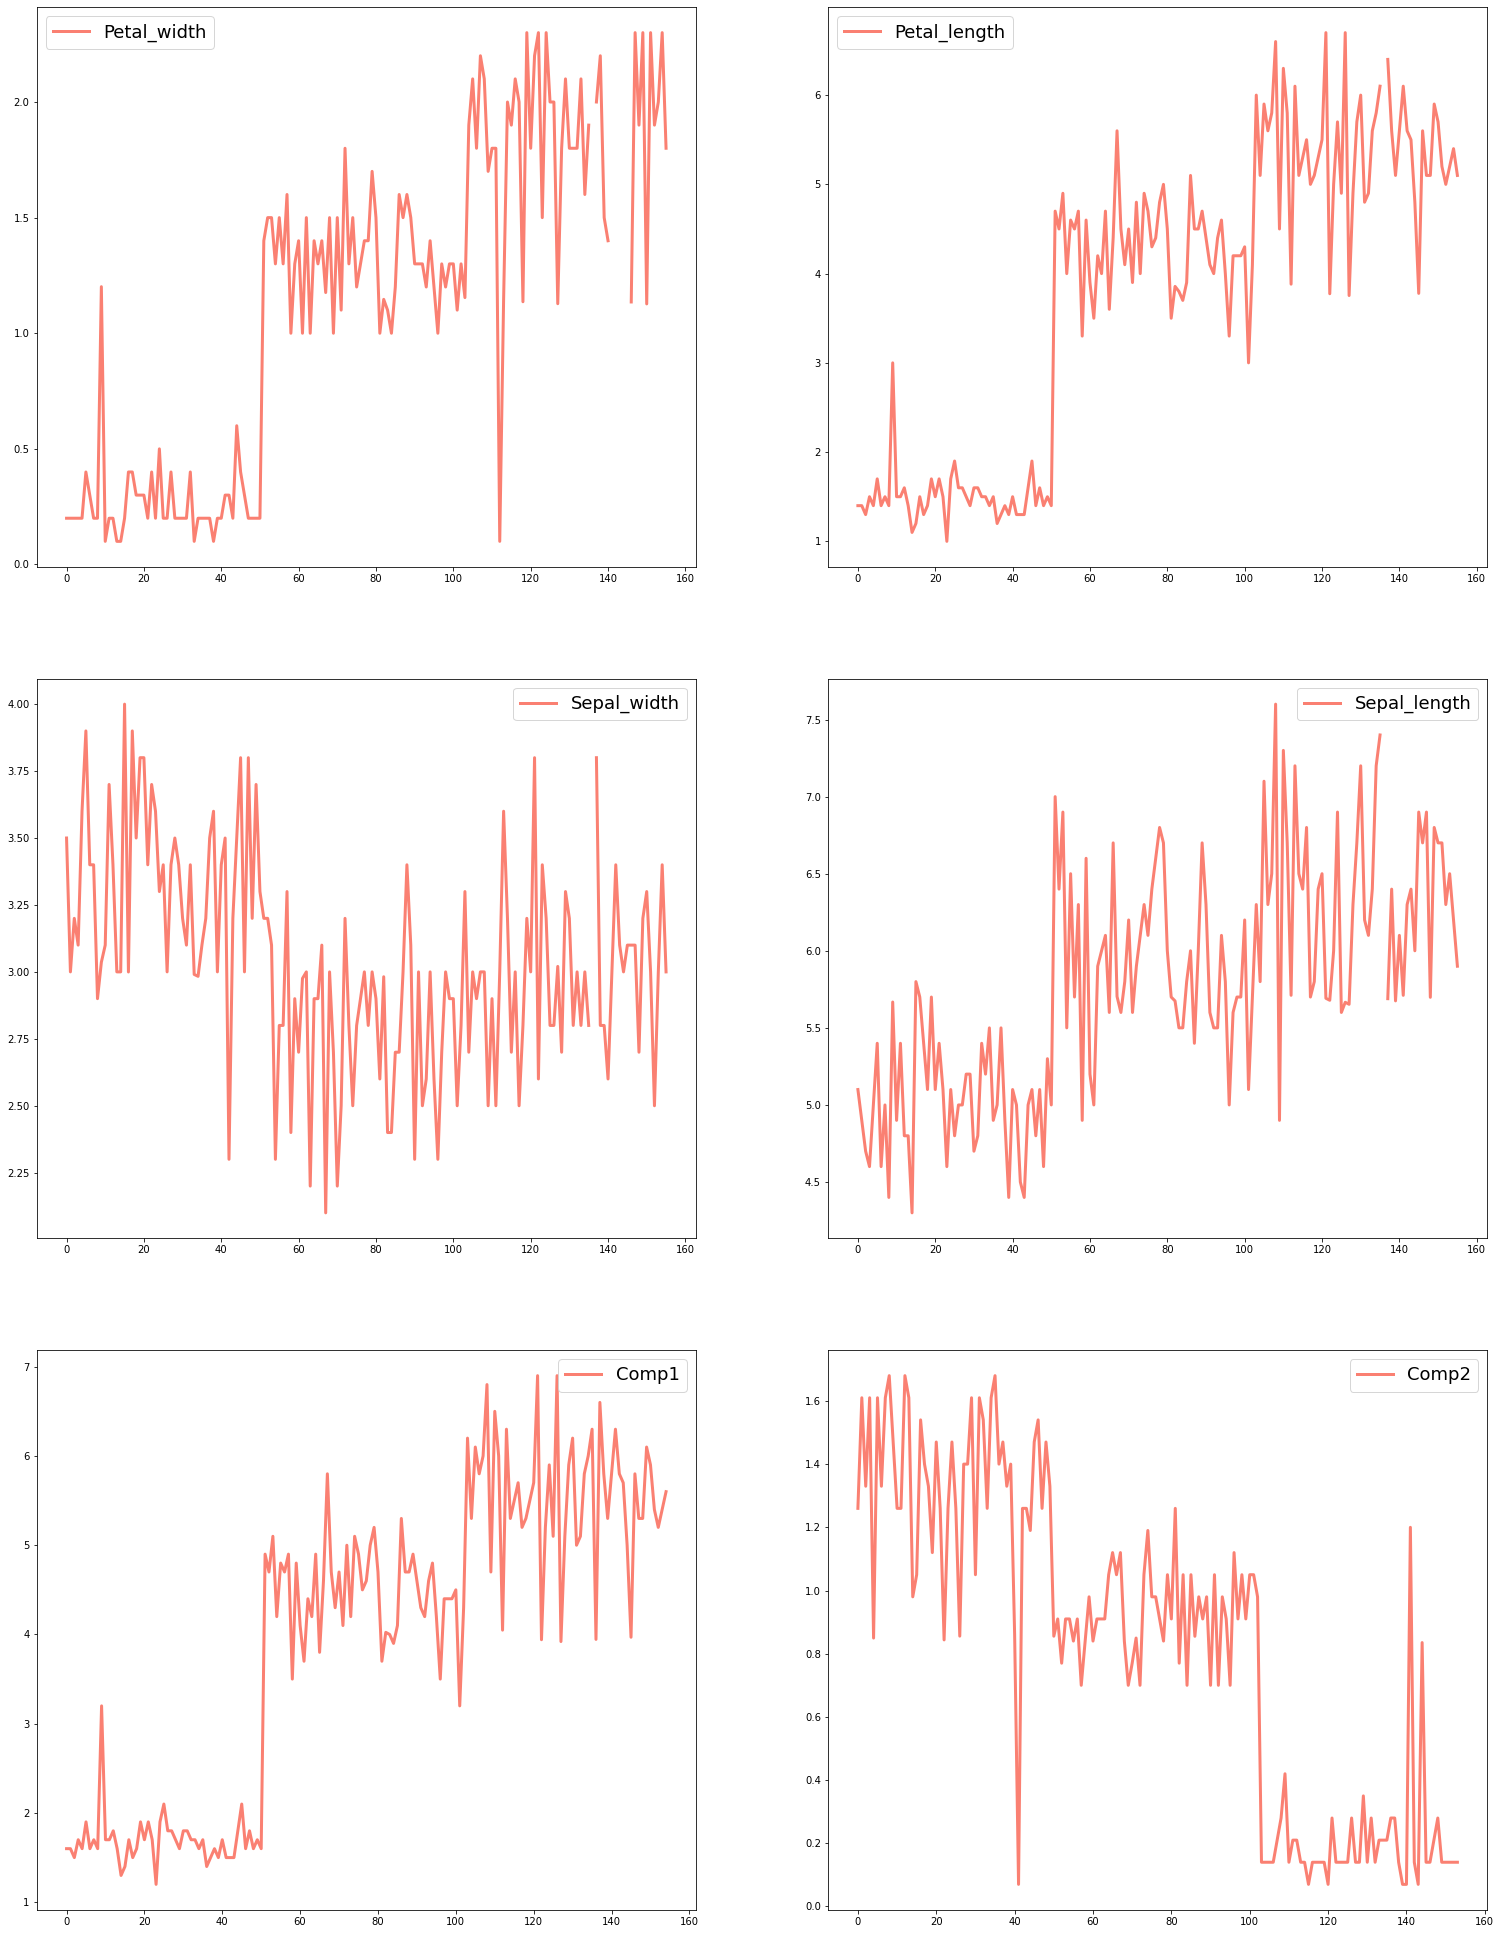

In [166]:
#Lines
plt.figure(figsize=(26, 35))

plt.subplot(321)
plt.plot(dataset['Petal_width'], color = 'salmon', label = 'Petal_width',linewidth = '3' )
plt.legend(fontsize=18)

plt.subplot(322)
plt.plot(dataset['Petal_length'], color = 'salmon', label = 'Petal_length',linewidth = '3' )
plt.legend(fontsize=18)

plt.subplot(323)
plt.plot(dataset['Sepal_width'], color = 'salmon', label = 'Sepal_width',linewidth = '3')
plt.legend(fontsize=18)

plt.subplot(324)
plt.plot(dataset['Sepal_length'], color = 'salmon', label = 'Sepal_length',linewidth = '3')
plt.legend(fontsize=18)

plt.subplot(325)
plt.plot(dataset['Comp1'], color = 'salmon', label = 'Comp1', linewidth = '3')
plt.legend(fontsize=18)

plt.subplot(326)
plt.plot(dataset['Comp2'], color = 'salmon', label = 'Comp2',linewidth = '3')
#plt.plot(float_Comp2, color = 'salmon', label = 'Comp2',linewidth = '3')
plt.legend(fontsize=18)

plt.show()

> Notamos que los valores negativos para width y length ya no estan presentes

### Nuevo Boxplot 
> Con los datos corregidos volvemos a relizar un boxplot

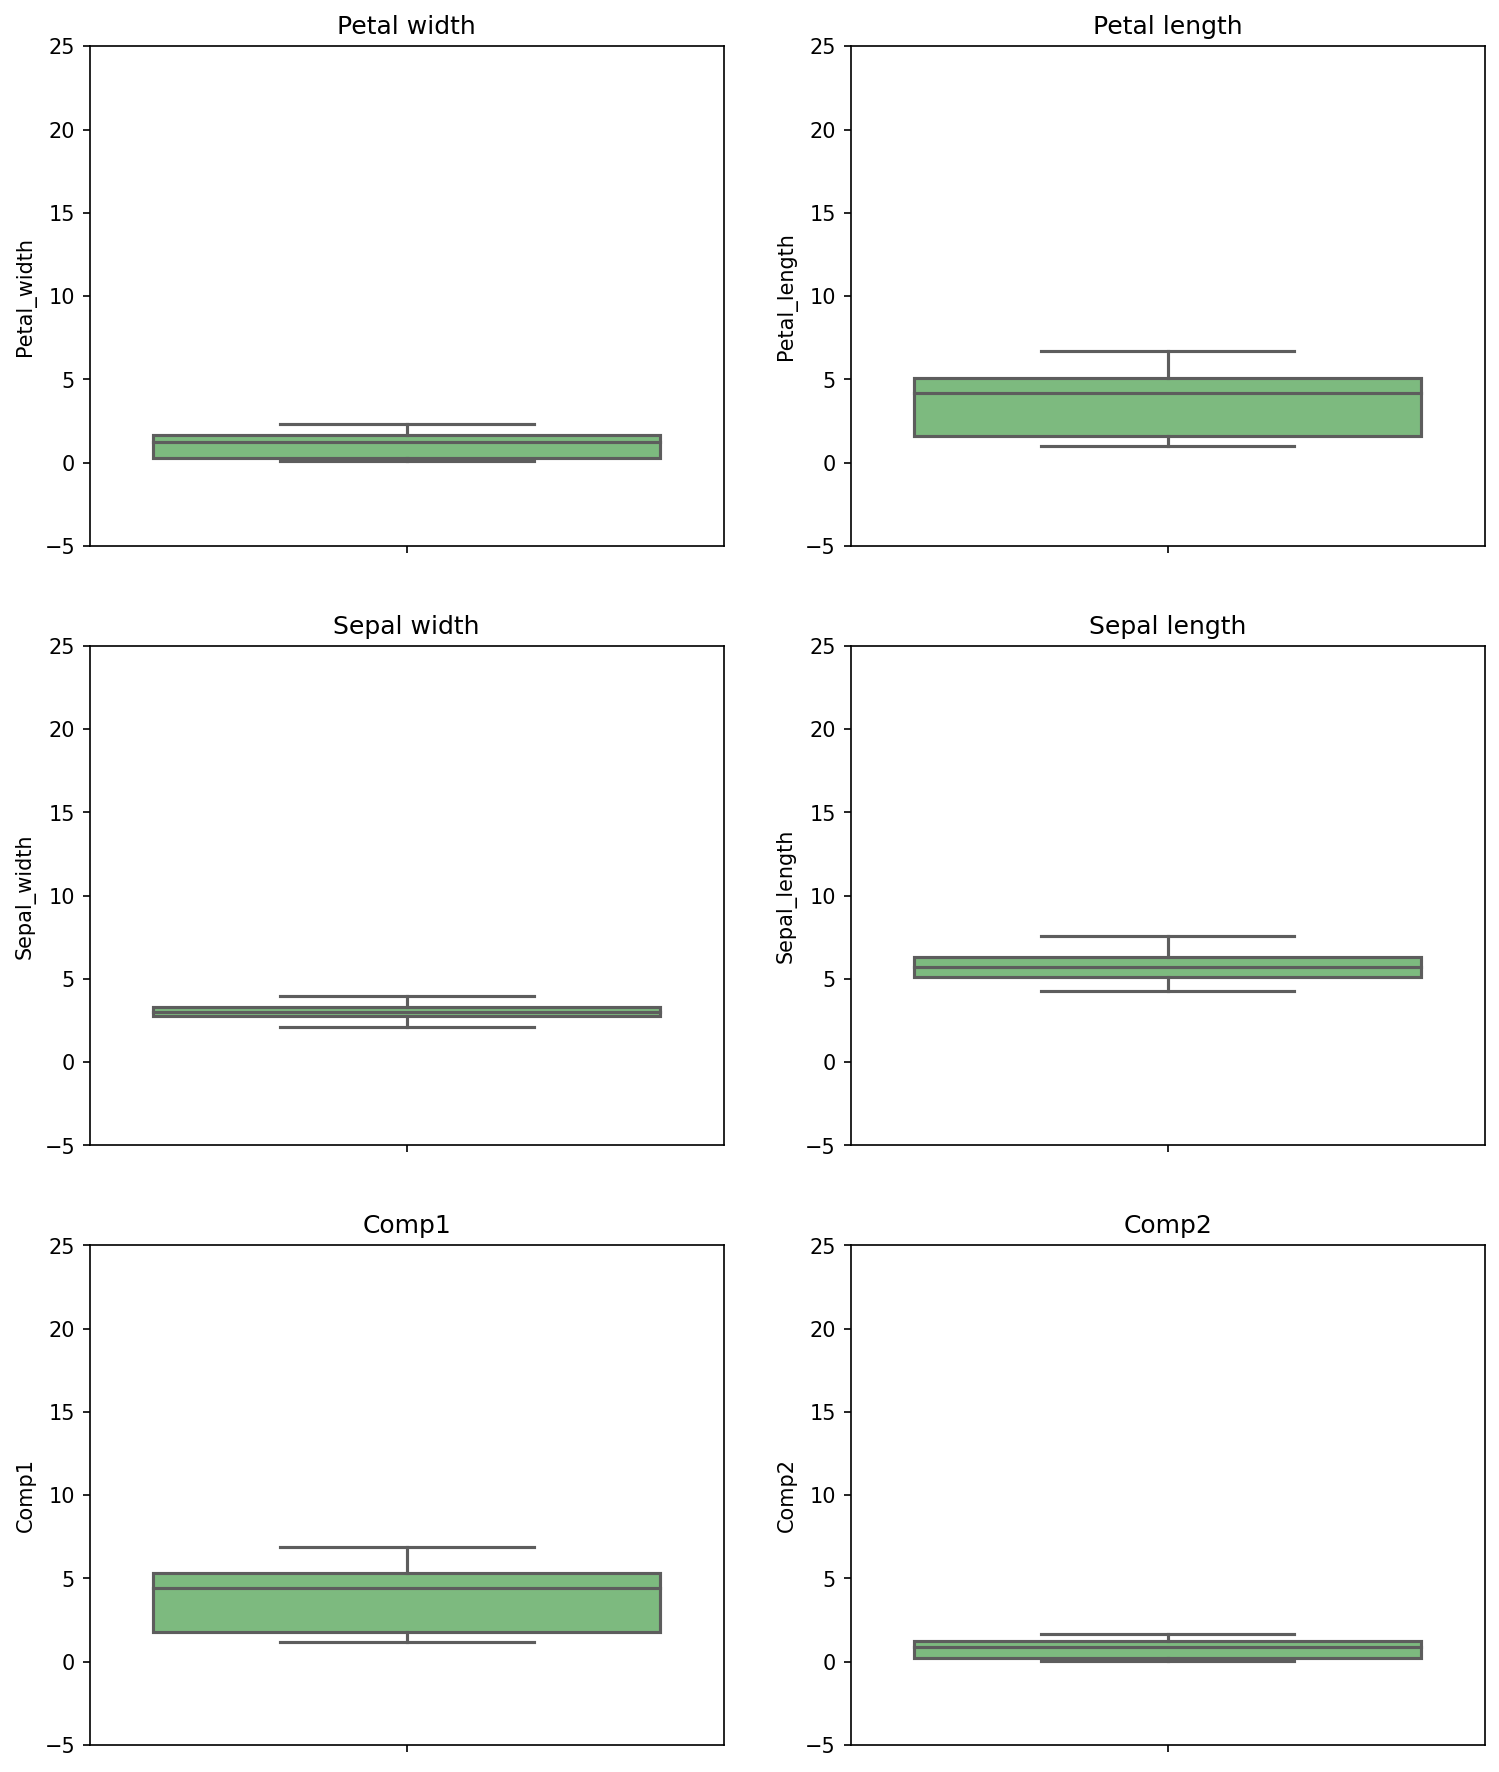

In [167]:
plt.figure(figsize=(12, 15), dpi=150)
csfont = {'fontname':'Cambria'}

plt.subplot(321)
sns.boxplot(y=dataset['Petal_width'], palette="Greens")
plt.title('Petal width', **csfont)
plt.ylim(-5,25)

plt.subplot(322)
sns.boxplot(y=dataset['Petal_length'], palette="Greens")
plt.title('Petal length')
plt.ylim(-5,25)

plt.subplot(323)
sns.boxplot(y=dataset['Sepal_width'], palette="Greens")
plt.title('Sepal width', )
plt.ylim(-5,25)

plt.subplot(324)
sns.boxplot(y=dataset['Sepal_length'], palette="Greens")
plt.title('Sepal length')
plt.ylim(-5,25)

plt.subplot(325)
sns.boxplot(y=dataset['Comp1'], palette="Greens")
plt.title('Comp1')
plt.ylim(-5,25)

plt.subplot(326)
sns.boxplot(y=dataset['Comp2'], palette="Greens")
plt.title('Comp2')
plt.ylim(-5,25)

#plt.savefig('boxs.pdf')

plt.show()


> Notamos que los outliers presenten en el primer grafico de boxplot ya no estan presentes.

## Elementos Nulos

In [168]:
print('Elementos Nulos por culumnas')
dataset.isna().sum()

Elementos Nulos por culumnas


Species_No      0
Petal_width     6
Petal_length    1
Comp1           1
Sepal_width     1
Sepal_length    1
Species_name    1
Obs             5
Comp2           2
dtype: int64

> Notamos que 8 de las 9 columnas presentan elementos nulos. 


#### ¿Qué tipo de datos son los elementos faltantes?

In [169]:
dataset.dtypes

Species_No        int64
Petal_width     float64
Petal_length    float64
Comp1           float64
Sepal_width     float64
Sepal_length    float64
Species_name     object
Obs              object
Comp2           float64
dtype: object

> Notamos que la mayoria de las columnas con elementos nulos son del tipo numericas

> Existen dos columnas 'Species_name' y 'Obs' del tipo no numericas que poseen elementos nulos. 

> **Es posible completar de alguna manera los elementos numericos faltantes(rellenar con la media, interpolacion, entre otras), pero los elementos no numericos
deben ser revisados de manera individual para conocer exactamente que tipo de informacion contienen y si estos pueden o no pueden ser corregidos.**

> Existe informacion en otras columnas que ayuden a rellenar los elementos faltantes?

#### Revision columnas 'Species_name' y 'Obs'

In [170]:
dataset[['Species_No','Species_name']]

,Species_No,Species_name
0,1,Setosa
1,1,Setosa
2,1,Setosa
3,1,Setosa
4,1,Setosa
...,...,...
151,3,Verginica
152,3,Verginica
153,3,Verginica
154,3,Verginica


In [171]:
print('Elementos presentes en "Species_No":', dataset['Species_No'].unique())

Elementos presentes en "Species_No": [1 2 3]


In [172]:
print('Elementos presentes en "Species_name":', dataset['Species_name'].unique())

Elementos presentes en "Species_name": [' Setosa' ' Versicolor' ' Verginica' nan]


> 'Species_name' Contiene el nombre de la especie. 

> 'Species_No' Contiene un numero identificador: 

>1 -> Setosa

> 2 -> Versicolor

> 3 -> Verginica

> **Necesitamos conocer la posicion del elemento faltante en Species_name para relacionarlo con Species_No**

In [173]:
#creamos una funcion que nos indica la posicion exacta de los elementos faltantes.
#como argumento recibe un pd.frame y 'name_column'
def find_nan_pos(data, col_name):
    nan_pos = []
    count = 0;
    for x in data.index:
        try:
            if str(data[col_name][x]) == 'nan':
                nan_pos = nan_pos + [x]
              
        except:
            print(count, 'dropped')
            
    return print('Null elements positions:', nan_pos)
    

In [174]:
#test function
find_nan_pos(dataset, 'Comp1')

Null elements positions: [155]


In [175]:
dataset[['Species_No','Species_name']].iloc[136]

Species_No        3
Species_name    NaN
Name: 136, dtype: object

> El elemento nulo pertenece a la categoria 3. Por lo tanto el elemento nulo = 'Verginica'

In [176]:
#cambiamos el valor
dataset['Species_name'].iloc[136] = ' Verginica' 

/home/mxmont/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [177]:
#revisamos nuevamente los elementos nulos
dataset.isna().sum()

Species_No      0
Petal_width     6
Petal_length    1
Comp1           1
Sepal_width     1
Sepal_length    1
Species_name    0
Obs             5
Comp2           2
dtype: int64

> Corroboramos que hermos eliminado los elementos nulos de 'Species_name'

#### Ahora analizamos la columna 'Obs'

In [178]:
dataset['Obs']

0      James
1      James
2      James
3      James
4      Peter
       ...  
151    Peter
152    Peter
153    Peter
154    Peter
155    Peter
Name: Obs, Length: 156, dtype: object

> Contiene nombre de los observadores. **No es posible autocompletar sin informacion adicional**

**Como no es posible completar de manera certera los elementos nulos de 'Obs'
se procedera a elimnar las filas que contengan elementos nulos en estas dos columnas**

## Dropna (for some columns)

In [179]:
dataset.shape

(156, 9)

In [180]:
dataset.isna().sum()

Species_No      0
Petal_width     6
Petal_length    1
Comp1           1
Sepal_width     1
Sepal_length    1
Species_name    0
Obs             5
Comp2           2
dtype: int64

In [181]:
#eliminamos las filas que poseean elementos nulos en las columnas [Obs']
dataset.dropna(subset = ['Obs'], axis=0, inplace=True)

In [182]:
dataset.shape

(151, 9)

In [183]:
dataset.isna().sum()

Species_No      0
Petal_width     6
Petal_length    1
Comp1           1
Sepal_width     1
Sepal_length    1
Species_name    0
Obs             0
Comp2           2
dtype: int64

> Los elementos nulos de 'Obs' ya no existen. Se han eliminado las filas donde estos estaban.

## Fix Columnas del tipo Numericas
> Analizamos la posicion de los elementos faltantes

> Utilizaremos la media de las columnas con elementos nulos para rellenar los respectivos espacios sin datos. La media que se calculara no considera el total de datos, sino que dependera de la especie en cuestion.


#### Posición

In [184]:
print('========================= Petal_width =========================')
find_nan_pos(dataset, 'Petal_width')

print('========================= Petal_length =========================')
find_nan_pos(dataset, 'Petal_length')

print('========================= Comp1 =========================')
find_nan_pos(dataset, 'Comp1')

print('========================= Comp2 =========================')
find_nan_pos(dataset, 'Comp2')

print('========================= Sepal_width =========================')
find_nan_pos(dataset, 'Sepal_width')

print('========================= Sepal_length =========================')
find_nan_pos(dataset, 'Sepal_length')

========================= Petal_width =========================
Null elements positions: [136, 141, 142, 143, 144, 145]
========================= Petal_length =========================
Null elements positions: [136]
========================= Comp1 =========================
Null elements positions: [155]
========================= Comp2 =========================
Null elements positions: [154, 155]
========================= Sepal_width =========================
Null elements positions: [136]
========================= Sepal_length =========================
Null elements positions: [136]


> Notamos que en la posicion 136 posee la mayoria de los elementos vacios. 'Comp1' y 'Comp2' son la excepcion.

> Para rellenar los datos faltantes de [Petal_width, Sepal_width, Sepal_length] vamos a considerar la media de los valores correspondientes a la especie en la posicion 136, es decir 'Verginica'

> Para ['Petal_width', 'Comp2'] realizaremos algo simililar pero cada dato faltante se rellenera con la media de la especie correspondiente.


In [185]:
print('posicion 0: ', dataset['Species_name'][0])
print('posicion 1: ', dataset['Species_name'][1])
print('posicion 136: ', dataset['Species_name'][136])
print('posicion 141: ', dataset['Species_name'][141])
print('posicion 142: ', dataset['Species_name'][142])
print('posicion 143: ', dataset['Species_name'][143])
print('posicion 144: ', dataset['Species_name'][144])
print('posicion 145: ', dataset['Species_name'][145])

posicion 0:   Setosa
posicion 1:   Setosa
posicion 136:   Verginica
posicion 141:   Verginica
posicion 142:   Verginica
posicion 143:   Verginica
posicion 144:   Verginica
posicion 145:   Verginica


#### Buscamos los datos pertenecientes solo a la especie 'Verginica' y 'Setosa'

In [186]:
#lista que almacena las posiciones de verginica
virginica_pos = []
for i in dataset.index:
    if dataset['Species_No'][i] == 3:
        virginica_pos = [i] + virginica_pos     
        
#lista que almacena las posiciones de setosa
setosa_pos = []
for i in dataset.index:
    if dataset['Species_No'][i] == 1:
        setosa_pos = [i] + setosa_pos     

In [187]:
dataset.columns

Index(['Species_No', 'Petal_width', 'Petal_length', 'Comp1', 'Sepal_width',
       'Sepal_length', 'Species_name', 'Obs', 'Comp2'],
      dtype='object')

In [188]:
#creamos listas que almacenen los datos de la especie 'Virginica'
petal_w = []
petal_l = []
sepal_w = []
sepal_l = []
comp1 = []
comp2 = []
col = ['Petal_width', 'Petal_length', 'Comp1', 'Sepal_width',
       'Sepal_length', 'Comp2'] #columnas a revisar dataset.columns

for i in col:
    for j in virginica_pos:       #virginica case
        if i == 'Petal_width':
            petal_w = [dataset[i][j]] + petal_w
        if i == 'Petal_length':
            petal_l = [dataset[i][j]] + petal_l
        if i == 'Comp1':
            comp1 = [dataset[i][j]] + comp1
        if i == 'Sepal_width':
            sepal_w = [dataset[i][j]] + sepal_w
        if i == 'Sepal_length':
            sepal_l = [dataset[i][j]] + sepal_l
            
for i in col:
    for j in setosa_pos:          #setosa case            
        if i == 'Comp2':
            comp2 = [dataset[i][j]] + comp2

In [189]:
#Creamos una funcion que calcula el promedio de los valores de una lista(sin considerar los datos 'nan')
def average(lista):
    for i in range(len(lista)):
        if i == 0:
            clean_list = [] 
        if str(lista[i]) != 'nan' :
            clean_list = [lista[i]] + clean_list #guardamos
    return sum(clean_list)/len(clean_list)

## Rellenamos los datos vacios
> Utilizamos el promedio de las mediciones para cada columna correspondiente

In [190]:
dataset['Petal_width'].fillna(average(petal_w), inplace=True) #columna Petal_width  
dataset['Petal_length'].fillna(average(petal_l), inplace=True) #columna Petal_length
dataset['Sepal_width'].fillna(average(sepal_w), inplace=True) #columna Sepal_width
dataset['Sepal_length'].fillna(average(sepal_l), inplace=True) #columna Sepal_length
dataset['Comp1'].fillna(average(comp1), inplace=True) #columna Comp1
dataset['Comp2'].fillna(average(comp2), inplace=True) #columna Comp2

In [191]:
dataset.isna().sum()

Species_No      0
Petal_width     0
Petal_length    0
Comp1           0
Sepal_width     0
Sepal_length    0
Species_name    0
Obs             0
Comp2           0
dtype: int64

> **NO EXISTEN ELEMENTOS NULOS**

# Rangos de las caracteristicas numericas

In [192]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 155
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Species_No    151 non-null    int64  
 1   Petal_width   151 non-null    float64
 2   Petal_length  151 non-null    float64
 3   Comp1         151 non-null    float64
 4   Sepal_width   151 non-null    float64
 5   Sepal_length  151 non-null    float64
 6   Species_name  151 non-null    object 
 7   Obs           151 non-null    object 
 8   Comp2         151 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 16.8+ KB


In [193]:
num_data = dataset[['Species_No', 'Petal_width', 'Petal_length', 'Comp1', 'Sepal_width',
       'Sepal_length', 'Comp2']]

In [194]:
print("Minimos:")
print(num_data.min())
print('')
print("=============================")
print('')
print("Maximos:")
num_data.max()

Minimos:
Species_No      1.00
Petal_width     0.10
Petal_length    1.00
Comp1           1.20
Sepal_width     2.10
Sepal_length    4.30
Comp2           0.07
dtype: float64


Maximos:


Species_No      3.00
Petal_width     2.30
Petal_length    6.70
Comp1           6.90
Sepal_width     4.00
Sepal_length    7.60
Comp2           1.68
dtype: float64

> Visualzando los rangos maximos y minimos podemos notar que es necesario ajustar a la misma escala todas las caracteristicas (Numericas)

In [195]:
#importamos MinMaxScaler
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [196]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(num_data)
scaled_df = pd.DataFrame(scaled_df, columns=['Species_No', 'Petal_width', 'Petal_length', 'Comp1', 'Sepal_width',
       'Sepal_length', 'Comp2'])

In [197]:
scaled_df

,Species_No,Petal_width,Petal_length,Comp1,Sepal_width,Sepal_length,Comp2
0,0.0,0.045455,0.070175,0.070175,0.736842,0.242424,0.739130
1,0.0,0.045455,0.070175,0.070175,0.473684,0.181818,0.956522
2,0.0,0.045455,0.052632,0.052632,0.578947,0.121212,0.782609
3,0.0,0.045455,0.087719,0.087719,0.526316,0.090909,0.956522
4,0.0,0.045455,0.070175,0.070175,0.789474,0.212121,0.484149
...,...,...,...,...,...,...,...
146,1.0,1.000000,0.736842,0.736842,0.473684,0.727273,0.043478
147,1.0,0.818182,0.701754,0.701754,0.210526,0.606061,0.043478
148,1.0,0.863636,0.736842,0.736842,0.473684,0.666667,0.043478
149,1.0,1.000000,0.771930,0.771930,0.684211,0.575758,0.776583


In [198]:
print("Minimos:")
print(scaled_df.min())
print('')
print("=============================")
print('')
print("Maximos:")
scaled_df.max()

Minimos:
Species_No      0.0
Petal_width     0.0
Petal_length    0.0
Comp1           0.0
Sepal_width     0.0
Sepal_length    0.0
Comp2           0.0
dtype: float64


Maximos:


Species_No      1.0
Petal_width     1.0
Petal_length    1.0
Comp1           1.0
Sepal_width     1.0
Sepal_length    1.0
Comp2           1.0
dtype: float64

> **Datos Normalizados**

# CORRELACION

In [199]:
import seaborn as sn

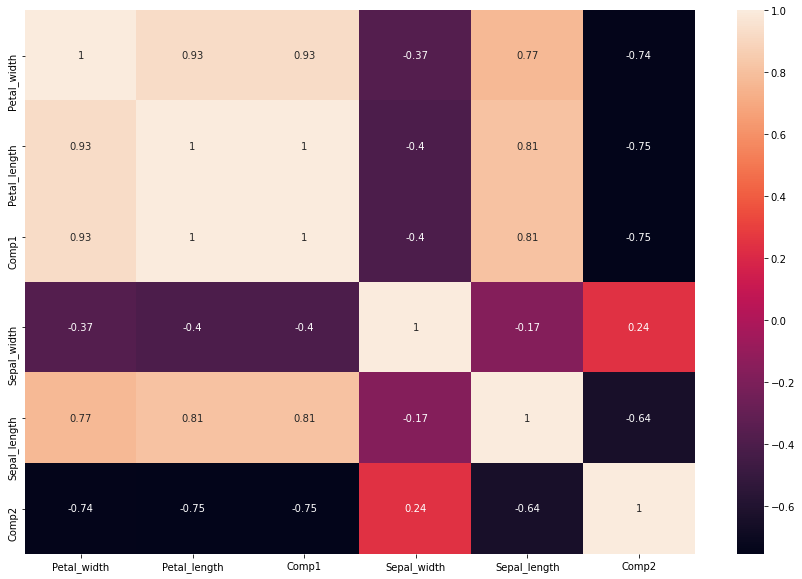

In [200]:
#create corrmatrix
plt.figure(figsize=(15, 10))
corr_matrix = scaled_df.drop('Species_No', axis='columns').corr()

sn.heatmap(corr_matrix , annot=True)
#plt.savefig("corr_matrix.eps")
plt.show()

> Notamos que existe una correlacion total entre las columnas 'Comp1' y 'Petal_length'. Podemos eliminar una de estas dos.

> Exise tamien una correlacion muy alta(>90%) entre 'Comp1'-'Petal_width' y 'Petal_length'-'Petal_width'

> Se descartaran las columnas 'Comp1' y 'Petal_width'

In [201]:
scaled_df.drop(['Comp1', 'Petal_width'], axis='columns', inplace=True)

In [202]:
scaled_df

,Species_No,Petal_length,Sepal_width,Sepal_length,Comp2
0,0.0,0.070175,0.736842,0.242424,0.739130
1,0.0,0.070175,0.473684,0.181818,0.956522
2,0.0,0.052632,0.578947,0.121212,0.782609
3,0.0,0.087719,0.526316,0.090909,0.956522
4,0.0,0.070175,0.789474,0.212121,0.484149
...,...,...,...,...,...
146,1.0,0.736842,0.473684,0.727273,0.043478
147,1.0,0.701754,0.210526,0.606061,0.043478
148,1.0,0.736842,0.473684,0.666667,0.043478
149,1.0,0.771930,0.684211,0.575758,0.776583


In [203]:
for x in range(scaled_df.shape[0]):
    
    if scaled_df.iloc[x,0] == 0.0:
        scaled_df.iloc[x,0] = int(0);
        
    if scaled_df.iloc[x,0] == 0.5:
        scaled_df.iloc[x,0] = 2;
    if scaled_df.iloc[x,0] == 1.0:
        scaled_df.iloc[x,0] = 3;

> 1 -> Setosa

> 2 -> Versicolor

> 3 -> Verginica

**Estos seran nuestros targets en el proceso de clasificación**

In [204]:
scaled_df

,Species_No,Petal_length,Sepal_width,Sepal_length,Comp2
0,0.0,0.070175,0.736842,0.242424,0.739130
1,0.0,0.070175,0.473684,0.181818,0.956522
2,0.0,0.052632,0.578947,0.121212,0.782609
3,0.0,0.087719,0.526316,0.090909,0.956522
4,0.0,0.070175,0.789474,0.212121,0.484149
...,...,...,...,...,...
146,3.0,0.736842,0.473684,0.727273,0.043478
147,3.0,0.701754,0.210526,0.606061,0.043478
148,3.0,0.736842,0.473684,0.666667,0.043478
149,3.0,0.771930,0.684211,0.575758,0.776583


# Guardamos el nuevo Dataset

In [205]:
new_df = scaled_df

In [206]:
new_df.to_excel('new_df.xlsx')

# Trabajamos con Este nuevo Dataset

In [207]:
dataset = new_df

In [208]:
dataset

,Species_No,Petal_length,Sepal_width,Sepal_length,Comp2
0,0.0,0.070175,0.736842,0.242424,0.739130
1,0.0,0.070175,0.473684,0.181818,0.956522
2,0.0,0.052632,0.578947,0.121212,0.782609
3,0.0,0.087719,0.526316,0.090909,0.956522
4,0.0,0.070175,0.789474,0.212121,0.484149
...,...,...,...,...,...
146,3.0,0.736842,0.473684,0.727273,0.043478
147,3.0,0.701754,0.210526,0.606061,0.043478
148,3.0,0.736842,0.473684,0.666667,0.043478
149,3.0,0.771930,0.684211,0.575758,0.776583


# Implemenación Support Vector Machines

Steps: 

> Seperate features and target

> Fit model

> Test model

In [209]:
from sklearn import preprocessing
X = dataset.drop(['Species_No'], axis=1) #drop target row  (features)
y = dataset['Species_No']  #select target row (terget)

In [210]:
from sklearn.model_selection import train_test_split
#make split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #80% de la data para train | 20% de la data para test

In [211]:
from sklearn import svm  #import the model

#charge the model
model = svm.SVC(kernel='poly') # Polynomial Kernel. Podemos variar este y otros hiperparametros. Dependera de nuestro objetivo y nuestros resultados.

#Train 
model.fit(X_train, y_train)

#Test
y_pred = model.predict(X_test)

# Desempeño del modelo (Métricas)

In [212]:
#importamos un paquete para facilitar el calculo de las metricas de desempeño
from sklearn import metrics

#Exactitud de nuestro modelo
#utilizamos los datos de test y los predichos en model.predict... (bloque anterior)
print("Exactitud",metrics.accuracy_score(y_test, y_pred))


# Precisión
print("Precisión:",metrics.precision_score(y_test, y_pred, average='macro'))

#Recall
print("Recall:",metrics.recall_score(y_test, y_pred, average='macro'))

Exactitud 0.9032258064516129
Precisión: 0.9285714285714285
Recall: 0.9285714285714285
